In [10]:
!pip install -q tensorflow-gpu==2.0.0-rc1
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tf.keras.utils import plot_model

ModuleNotFoundError: ignored

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape)
print(len(x_train))
# print(y_train[0])

(60000, 28, 28)
60000


In [5]:
# Model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax'),
])

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 512, 512, 64) 1792        input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_8 (BatchNor (None, 512, 512, 64) 256         conv2d_8[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_8 (LeakyReLU)       (None, 512, 512, 64) 0           batch_normalization_8[0][0]      
____________________________________________________________________________________________

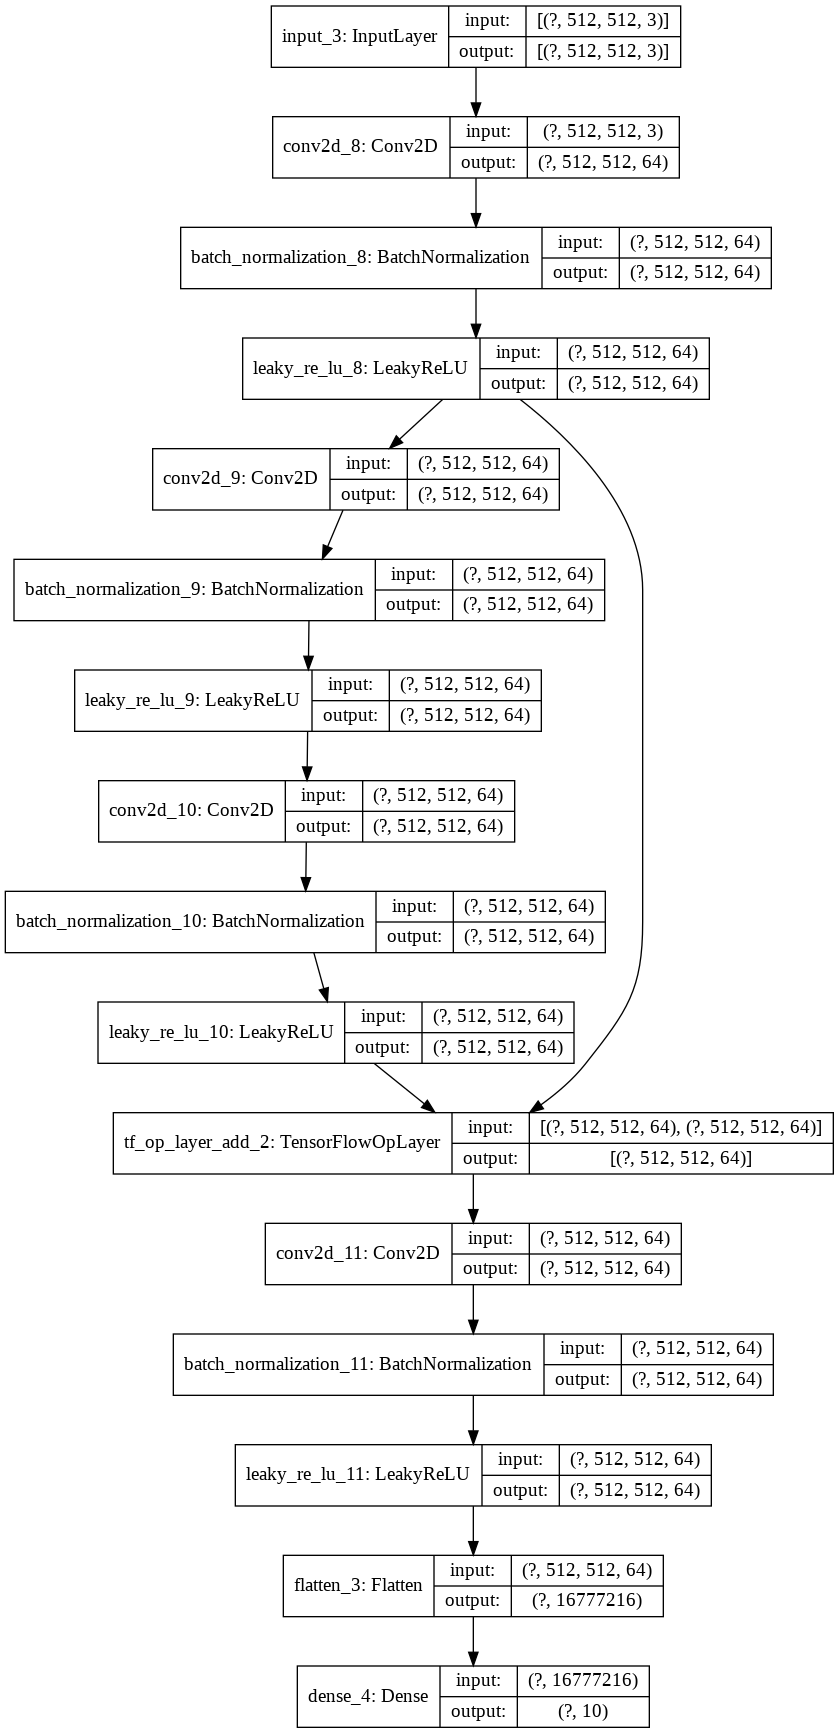

In [11]:
input = Input(shape=(512,512,3))
x = Conv2D(64, (3,3), padding="SAME")(input)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x_res = x
x = Conv2D(64, (3,3), padding="SAME")(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Conv2D(64, (3,3), padding="SAME")(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = x+x_res

x = Conv2D(64, (3,3), padding="SAME")(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Flatten()(x)
output = Dense(units=10, activation='softmax')(x)

model = tf.keras.models.Model(inputs=[input], outputs=output)
model.summary()

dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 93us/sample - loss: 2.3027 - accuracy: 0.7532
Epoch 2/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.5936 - accuracy: 0.8429
Epoch 3/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.4727 - accuracy: 0.8737
Epoch 4/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.4175 - accuracy: 0.8913
Epoch 5/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3861 - accuracy: 0.9005


In [ ]:
model.evaluate(x_test, y_test, verbose=2)

10000/1 - 1s - loss: 0.1617 - accuracy: 0.9367


[0.2935766686104238, 0.9367]